# Ejercicio 2

Librerías e imagen 📚

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

riceGrayScale = cv2.imread('rice.jpg', cv2.IMREAD_GRAYSCALE)

In [41]:
def showImage(image, title, cmap='gray'):
    plt.figure(figsize=(5,5))
    plt.imshow(image, cmap=cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()

## Binarización con Otsu

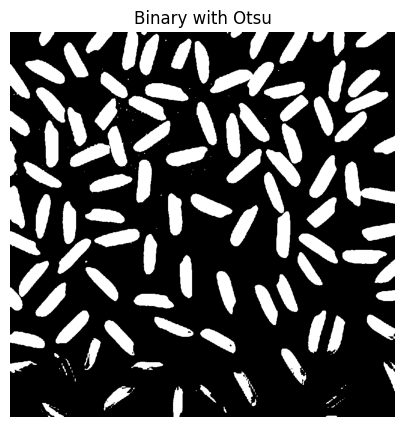

In [24]:
_, riceBinaryOtsu = cv2.threshold(riceGrayScale, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
showImage(riceBinaryOtsu, 'Binary with Otsu', cmap='gray')

## Operaciones morfológicas

### Con binarización con Otsu

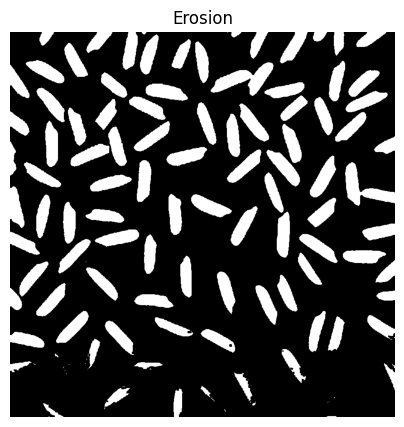

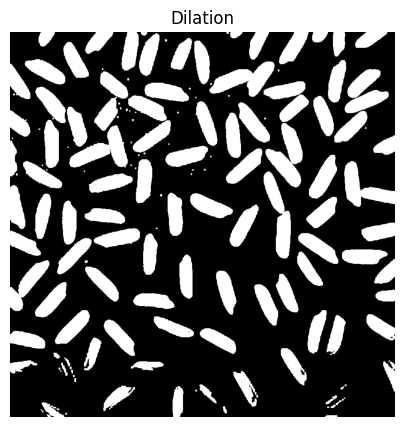

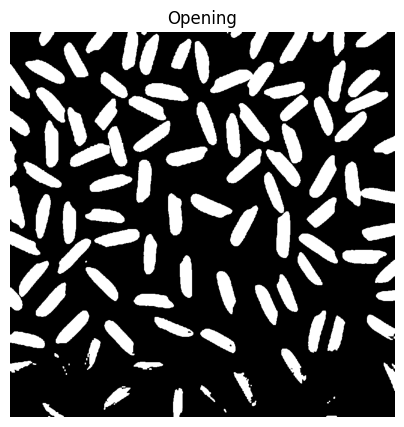

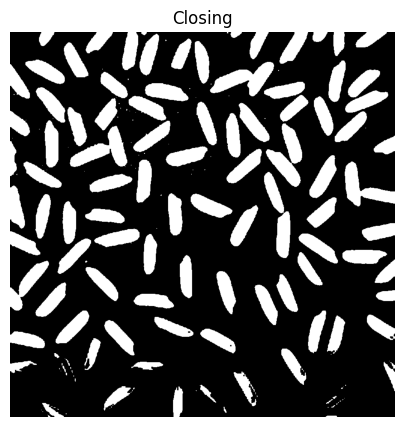

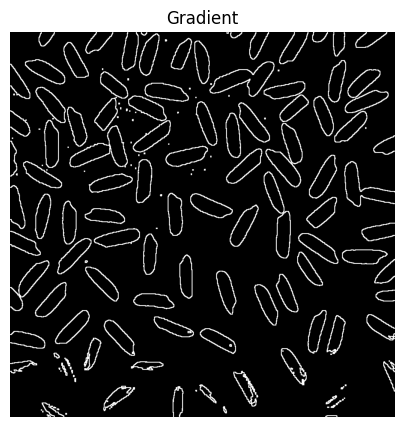

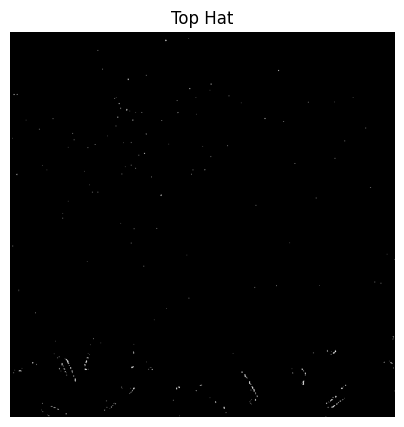

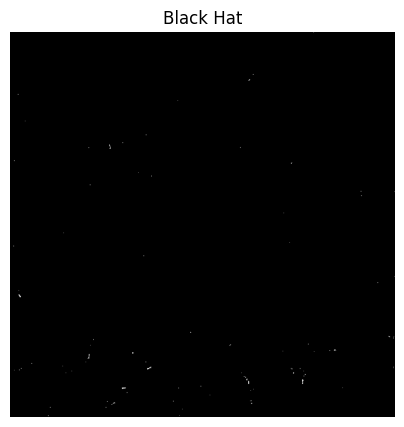

In [23]:
kernel = np.ones((3, 3), np.uint8)
erosion = cv2.erode(riceBinaryOtsu, kernel, iterations=1)
showImage(erosion, 'Erosion', cmap='gray')
dilation = cv2.dilate(riceBinaryOtsu, kernel, iterations=1)
showImage(dilation, 'Dilation', cmap='gray')
opening = cv2.morphologyEx(riceBinaryOtsu, cv2.MORPH_OPEN, kernel)
showImage(opening, 'Opening', cmap='gray')
closing = cv2.morphologyEx(riceBinaryOtsu, cv2.MORPH_CLOSE, kernel)
showImage(closing, 'Closing', cmap='gray')
gradient = cv2.morphologyEx(riceBinaryOtsu, cv2.MORPH_GRADIENT, kernel)
showImage(gradient, 'Gradient', cmap='gray')
tophat = cv2.morphologyEx(riceBinaryOtsu, cv2.MORPH_TOPHAT, kernel)
showImage(tophat, 'Top Hat', cmap='gray')
blackhat = cv2.morphologyEx(riceBinaryOtsu, cv2.MORPH_BLACKHAT, kernel)
showImage(blackhat, 'Black Hat', cmap='gray')

### Mejor resultado obtenido

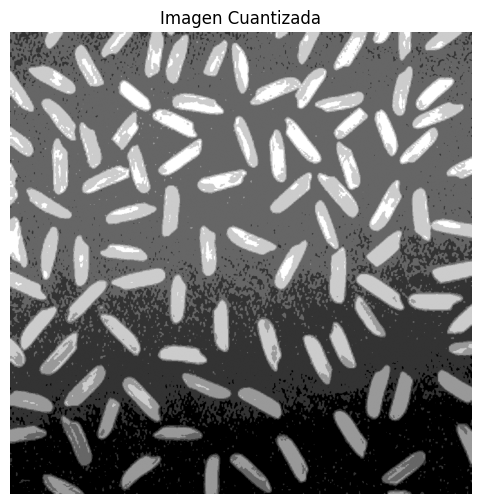

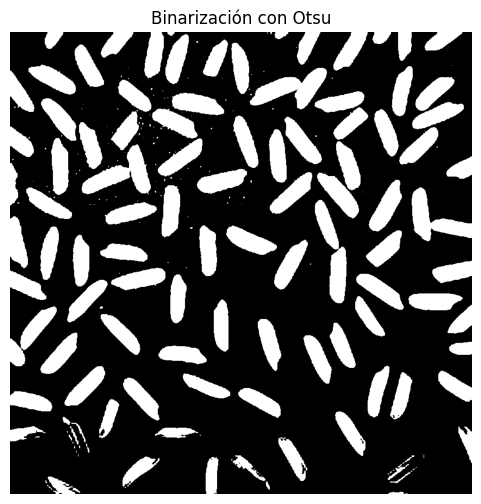

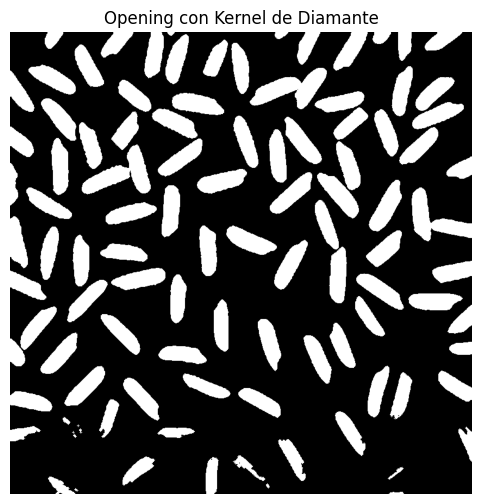

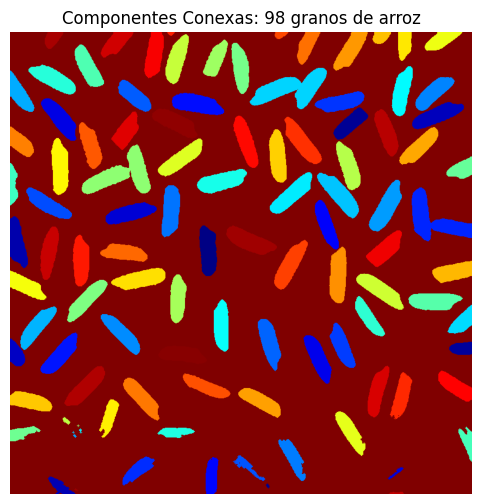

Total de granos detectados: 98


In [51]:
levels = 8
quantized = (riceGrayScale // (256 // levels)) * (256 // levels)
_, otsu = cv2.threshold(quantized, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
cross = np.array([[0, 0, 1, 0, 0],
                  [0, 0, 1, 0, 0],
                  [1, 1, 1, 1, 1],
                  [0, 0, 1, 0, 0],
                  [0, 0, 1, 0, 0]], dtype=np.uint8)
opening = cv2.morphologyEx(otsu, cv2.MORPH_OPEN, cross)
numLabels, labels, stats, centroids = cv2.connectedComponentsWithStats(opening, connectivity=4)
areas = stats[1:, cv2.CC_STAT_AREA]
minArea = np.percentile(areas, 5)
validLabels = [i for i in range(1, numLabels) if stats[i, cv2.CC_STAT_AREA] >= minArea]
numGrains = len(validLabels)
finalImage = cv2.applyColorMap((labels * 10).astype(np.uint8), cv2.COLORMAP_JET)

showImage(quantized, "Imagen Cuantizada")
showImage(otsu, "Binarización con Otsu")
showImage(opening, "Opening con Kernel de Diamante")
showImage(finalImage, f"Componentes Conexas: {numGrains} granos de arroz")
print(f"Total de granos detectados: {numGrains}")
